In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def apply_morphological_operations(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256))
    
    if img is None:
        raise Exception("Помилка при завантаженні зображення")
    
    # Бінаризація зображення (для кращих результатів морфологічних операцій)
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    # Створення ядра (структурного елемента)
    kernel = np.ones((5,5), np.uint8)
    
    # 1. Операція нарощування (dilation)
    dilation = cv2.dilate(binary, kernel, iterations=1)
    
    # 2. Операція ерозії (erosion)
    erosion = cv2.erode(binary, kernel, iterations=1)
    
    # 3. Операція розмикання (opening)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    # 4. Операція замикання (closing)
    closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # 5. Морфологічний градієнт
    gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)
    
    # Відображення результатів
    titles = ['Оригінал', 'Бінаризоване', 'Нарощування', 
             'Ерозія', 'Розмикання', 'Замикання', 'Градієнт']
    images = [img, binary, dilation, erosion, opening, closing, gradient]
    
    plt.figure(figsize=(20, 4))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, 'gray')
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return images

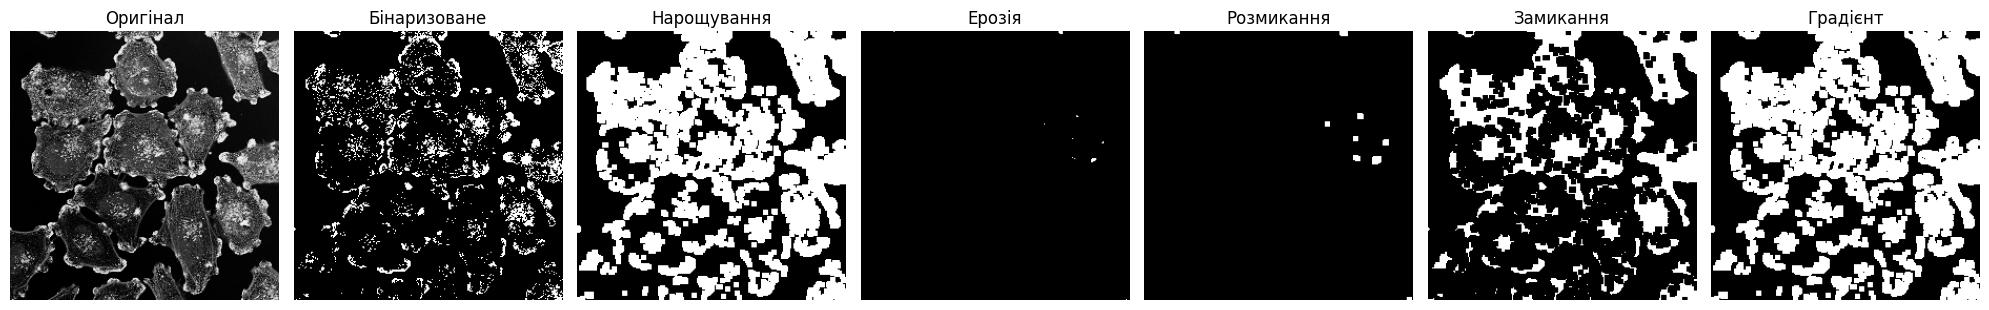

In [3]:
image_path = "sample.jpg"
    
try:
    results = apply_morphological_operations(image_path)
except Exception as e:
    print(f"error: {str(e)}")